<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Приведение-наименований-столбцов-к-общепринятому-формату" data-toc-modified-id="Приведение-наименований-столбцов-к-общепринятому-формату-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Приведение наименований столбцов к общепринятому формату</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-мультиколлинеарности" data-toc-modified-id="Проверка-мультиколлинеарности-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка мультиколлинеарности</a></span></li><li><span><a href="#Приведение-значений-к-единому-масштабу-(scaling)" data-toc-modified-id="Приведение-значений-к-единому-масштабу-(scaling)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Приведение значений к единому масштабу (scaling)</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Признаки-умножают-на-обратимую-матрицу.-Изменится-ли-качество-линейной-регрессии?" data-toc-modified-id="Признаки-умножают-на-обратимую-матрицу.-Изменится-ли-качество-линейной-регрессии?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?</a></span></li></ul></li><li><span><a href="#Выбор-алгоритма-преобразования" data-toc-modified-id="Выбор-алгоритма-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выбор алгоритма преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Обучение--и-тестирование-без-шифрования" data-toc-modified-id="Обучение--и-тестирование-без-шифрования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение  и тестирование без шифрования</a></span></li><li><span><a href="#Процедура-шифрования-с-использованием-матричного-умножения" data-toc-modified-id="Процедура-шифрования-с-использованием-матричного-умножения-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Процедура шифрования с использованием матричного умножения</a></span></li><li><span><a href="#Обучение-и-тестирование-на-зашифрованных-данных" data-toc-modified-id="Обучение-и-тестирование-на-зашифрованных-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение и тестирование на зашифрованных данных</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Для защиты персональных данных клиентов страховой компании "Хоть потоп" необходимо разработать метод преобразования данных, который усложнит восстановление персональной информации. Корректность работы метода должна быть обоснована, и при этом качество моделей машинного обучения не должно ухудшаться.

### Описание данных

Набор данных находится в файле `/datasets/insurance.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/insurance.csv).

-   **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
-   **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [39]:
#importing all the libraries needed
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
#warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from IPython.display import display
%matplotlib inline

RANDOM_STATE = 13

In [40]:
def data_read(df_name):
    try:
        data = pd.read_csv(f'C:\\Users\\m5612\\Downloads\\{df_name}.csv', 
        parse_dates=True)
    except:
        data = pd.read_csv(f'https://code.s3.yandex.net/datasets/{df_name}.csv', 
        parse_dates=True)
    return data

In [41]:
df = data_read('insurance')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


### Приведение наименований столбцов к общепринятому формату

In [42]:
# converting column names to lowercase using the separator "_"
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [43]:
# translation of column names into English
df.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_claims']

### Изучение данных

In [44]:
df.sample(7)

,gender,age,salary,family_members,insurance_claims
3255,1,41.0,79000.0,2,0
2315,1,38.0,42800.0,1,0
909,1,36.0,32300.0,0,0
361,0,50.0,24700.0,1,2
722,0,25.0,40200.0,1,0
4112,0,40.0,56300.0,1,0
1896,1,38.0,33200.0,2,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5000 non-null   int64  
 1   age               5000 non-null   float64
 2   salary            5000 non-null   float64
 3   family_members    5000 non-null   int64  
 4   insurance_claims  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [46]:
df.describe()

,gender,age,salary,family_members,insurance_claims
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


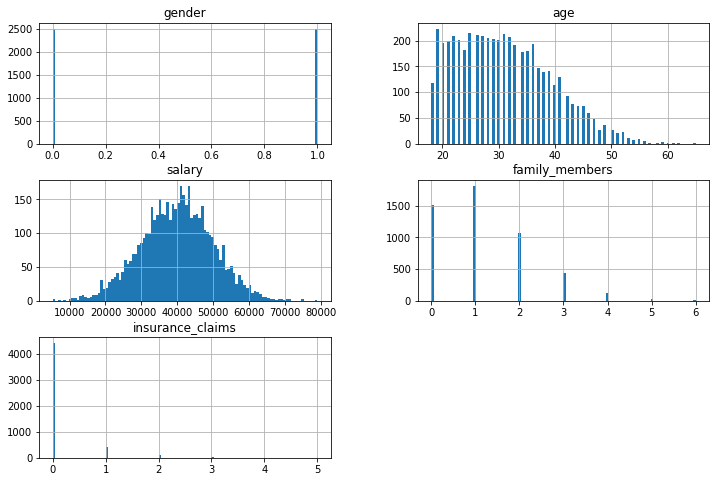

In [47]:
df.hist(bins=100, figsize=(12, 8));

In [48]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 153


In [49]:
print("Duplicate rows:\n", (df.loc[df.duplicated(), :]))

Duplicate rows:
       gender   age   salary  family_members  insurance_claims
281        1  39.0  48100.0               1                 0
488        1  24.0  32900.0               1                 0
513        0  31.0  37400.0               2                 0
718        1  22.0  32600.0               1                 0
785        0  20.0  35800.0               0                 0
...      ...   ...      ...             ...               ...
4793       1  24.0  37800.0               0                 0
4902       1  35.0  38700.0               1                 0
4935       1  19.0  32700.0               0                 0
4945       1  21.0  45800.0               0                 0
4965       0  22.0  40100.0               1                 0

[153 rows x 5 columns]


In [50]:
# counting the number of unique values in each column
unique_counts = df.nunique()
print(unique_counts)

gender                2
age                  46
salary              524
family_members        7
insurance_claims      6
dtype: int64


Очистка данных не требуется. 3% дубликатов при таком количестве уникальных значений вполне ожидаемо.
***

### Проверка мультиколлинеарности

Для проверки мультиколлинеарности в датафрейме можно использовать несколько методов. Один из наиболее распространенных методов - это вычисление матрицы корреляции между всеми переменными.

Используем метод corr() для вычисления матрицы корреляции между всеми переменными в датафрейме. Затем визуализируем эту матрицу в виде тепловой карты, используя библиотеку seaborn.

In [51]:
# calculate correlation matrix
corr_matrix = df.corr()
corr_matrix

,gender,age,salary,family_members,insurance_claims
gender,1.000000,0.002074,0.014910,-0.008991,0.010140
age,0.002074,1.000000,-0.019093,-0.006692,0.651030
salary,0.014910,-0.019093,1.000000,-0.030296,-0.014963
family_members,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
insurance_claims,0.010140,0.651030,-0.014963,-0.036290,1.000000


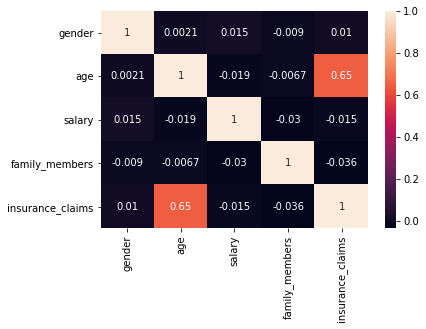

In [52]:
# visualize the correlation matrix as a heat map
sns.heatmap(corr_matrix, annot=True);

Cильная корреляция между признаками не обнаружена, мультиколлинеарности нет. Если такая корреляция обнаруживается, то можно рассмотреть возможность удаления одной из переменных или использования методов регуляризации для уменьшения мультиколлинеарности.

Проверка на мультиколлинеарность является важным шагом при анализе данных и построении моделей, так как мультиколлинеарность может привести к искажению результатов и уменьшению точности модели.

Мультиколлинеарность возникает, когда две или более независимые переменные в модели сильно коррелируют между собой. Это может привести к тому, что коэффициенты регрессии становятся неустойчивыми и неинтерпретируемыми, а также к переоценке значимости переменных в модели.

Проверка на мультиколлинеарность помогает идентифицировать такие проблемы и позволяет принять меры для их устранения. Например, можно удалить одну из скоррелированных переменных или объединить их в новую переменную, которая будет более общей. Также можно использовать методы регуляризации, такие как L1 и L2 регуляризация, чтобы снизить мультиколлинеарность в модели.

В целом, проверка на мультиколлинеарность является важным шагом для обеспечения точности и интерпретируемости результатов моделирования и анализа данных.

### Приведение значений к единому масштабу (scaling) 

Min-max нормализация: приводит значения столбца к диапазону от 0 до 1. Формула для применения данного метода:

$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$

где $x$ - значение в столбце, $x_{min}$ и $x_{max}$ - минимальное и максимальное значение в столбце соответственно.


In [53]:
# creating a MinMaxScaler object
scaler = MinMaxScaler()

In [54]:
# applying normalization to columns 'age' and 'salary'
df[['age', 'salary']] = scaler.fit_transform(df[['age', 'salary']])

In [55]:
df.head()

,gender,age,salary,family_members,insurance_claims
0,1,0.489362,0.601085,1,0
1,0,0.595745,0.443691,1,1
2,0,0.234043,0.213026,0,0
3,0,0.063830,0.493894,2,0
4,1,0.212766,0.282225,0,0


### Выводы:

Проведены следующие этапы: загрузка данных, приведение наименований столбцов к общепринятому формату, исследование данных,  проверка мультиколлинеарности и приведение значений к единому масштабу (scaling).

## Умножение матриц

### Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Если признаки умножают на обратимую матрицу, то качество линейной регрессии не изменится.

**Обоснование:** 

+  У нас есть ряд свойств:
    $$
(AB)^T=B^T A^T \tag 1
$$
$$
(AB)^{-1} = B^{-1} A^{-1} \tag 2
$$
$$
A A^{-1} = A^{-1} A = E \tag 3
$$
$$
AE = EA = A \tag 4
$$

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $A$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Для начала, запишем формулу для вектора весов $w$ линейной регрессии, полученной по методу наименьших квадратов:
$$
w = (X^T X)^{-1} X^T y
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$
Предсказания:

$$
a = Xw = X(X^T X)^{-1} X^T y
$$


Пусть $A$ - обратимая матрица. Рассмотрим новую матрицу объекты-признаки $X' = XA$. Заметим, что новый вектор весов $w'$ для матрицы $X'$ может быть вычислен так же, как и вектор весов $w$ для матрицы $X$:

$$
a' = X'w' = X'((X')^T X')^{-1} (X')^T y
$$

Подставим в это выражение матрицу $X' = XA$:

\begin{align*}
a' = XA((XA)^T XA)^{-1} (XA)^T y \
= XA(A^T X^T X A)^{-1} A^T X^T y \
= XA(A)^{-1}(X^T X)^{-1}(A^T)^{-1} A^T X^T y \
= XE (X^T X)^{-1}E X^T y \
= X(X^T X)^{-1} X^T y \
= Xw \
= a
\end{align*}

Данный набор преобразований описывает процесс получения вектора предсказаний $a$ в линейной регрессии методом наименьших квадратов с помощью матричных операций.

Разберем по шагам:

Предположим, что у нас есть матрица признаков $X$ размера $n\times m$, где $n$ - число наблюдений, а $m$ - число признаков, вектор-столбец ответов $y$ размера $n\times 1$ и вектор-столбец предсказаний $a'$, которые мы хотим определить.

1. Воспользуемся свойством: $$(AB)^T=B^T A^T$$ Получилось: $$XA(A^T X^T X A)^{-1} A^T X^T y$$ - где заменяем $(XA)^T XA)^{-1}$ на $(A^T X^T XA)^{-1}$.

2. Воспользуемся свойством: $$(ABC)^{-1} = C^{-1} B^{-1} A^{-1},$$ где $$A = A^T, B = X^T X, C = A$$ Получилось:    $$XA(A)^{-1}(X^T X)^{-1}(A^T)^{-1} A^T X^T y$$

3. Воспользуемся свойством: $$A A^{-1} = A^{-1} A = E$$
Получилось: $$XE (X^T X)^{-1}E X^T y$$.

5. Воспользуемся свойством: $$AE = EA = A$$ Получилось:$$X(X^T X)^{-1} X^T y$$ 

6. Итого получилось: $$Xw,$$ где заменяем  $(X^T X)^{-1} X^T y$ на $w$.

Таким образом, мы показали, что если матрица признаков 𝑋 умножается на обратимую матрицу 𝐴, то предсказания линейной регрессии не изменятся, т.е. качество линейной регрессии не изменится. 

## Выбор алгоритма преобразования

**Алгоритм**

Выберем Шифр Хилла (Hill cipher) - это шифр замены, в котором каждая буква открытого текста заменяется на соответствующую ей букву шифрованного текста с помощью матричной операции. Алгоритм шифрования состоит из следующих шагов:

Сначала текст разбивается на блоки по n символов, где n - размерность квадратной матрицы, используемой для шифрования.

Для каждого блока создается вектор-столбец, состоящий из чисел, соответствующих позициям букв в алфавите.

Затем создается квадратная матрица ключа, размерностью n x n, элементы которой выбираются случайным образом из конечного поля чисел по модулю размера алфавита.

Для каждого блока производится умножение матрицы ключа на вектор-столбец блока по модулю размера алфавита.

Полученный вектор-столбец переводится обратно в последовательность символов шифрованного текста.

Расшифрование осуществляется путем умножения матрицы-ключа на вектор-столбец зашифрованного текста и перевода полученного вектора-столбца в исходный текст.

Шифр Хилла был изобретен в 1929 году Лестером Хиллом и считается одним из самых простых и эффективных методов шифрования. Однако, существуют атаки на данный шифр, которые позволяют взломать его при некоторых условиях.

**Обоснование**

Во втором разделе мы привели доказательство, что если матрица признаков 𝑋 умножается на обратимую матрицу 𝐴, то предсказания линейной регрессии не изменятся.

Линейная регрессия использует параметры модели (веса), которые получаются путем минимизации ошибки предсказания на обучающих данных. При умножении признаков на обратимую матрицу, веса модели также будут преобразованы так, чтобы минимизировать ошибку на новых данных, составленных из преобразованных признаков.

## Проверка алгоритма

### Обучение  и тестирование без шифрования

In [56]:
# Remove the column "insurance_claims" from the dataframe and store all the remaining columns
features = df.drop(['insurance_claims'], axis=1)

# Select only the "insurance_claims" column from the dataframe and store it in the "target" variable
target = df['insurance_claims']

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=.25, random_state=RANDOM_STATE)

In [58]:
# Print the shapes of the training and testing data
print("Training data shape (features, target): ", X_train.shape, y_train.shape)
print("Testing data shape (features, target): ", X_test.shape, y_test.shape)

Training data shape (features, target):  (3750, 4) (3750,)
Testing data shape (features, target):  (1250, 4) (1250,)


In [59]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data and print the R^2 score
print(f'R^2 score on the test data: {model.score(X_test, y_test):0.4f}')

R^2 score on the test data: 0.4399


### Процедура шифрования с использованием матричного умножения 

Процедура может быть реализована следующим образом:

Генерация ключа: сгенерируем случайную невырожденную квадратную матрицу $K$ размера $n \times n$, где $n$ - это количество признаков в векторе фичей.

Шифрование: для матрицы фичей $X$ размера $m \times n$ вычисляем зашифрованную матрицу $Y$ размера $m \times n$ по формуле:

$$Y = XK$$

где $K$ - это ключевая матрица, а $X$ - это матрица фичей.

Дешифрование: для расшифровки зашифрованной матрицы $Y$ размера $m \times n$ используется обратная матрица $K^{-1}$, которая может быть вычислена, если матрица $K$ невырождена:
$$X = YK^{-1}$$

где $K^{-1}$ - это обратная матрица к матрице $K$.

Генерация случайной матрицы может привести к неопределенности. Чтобы убедиться, что матрица является невырожденной, используем проверку её определителя np.linalg.det(K) на равенство нулю. Если определитель равен нулю, то матрица вырожденная, и нужно сгенерировать новую матрицу до тех пор, пока не будет получена невырожденная матрица.

### Обучение и тестирование на зашифрованных данных

In [60]:
# Генерация ключа размера n x n
n = X_train.shape[1]
K = np.random.randint(1, 100, size=(n, n))
while np.linalg.det(K) == 0:
    K = np.random.randint(1, 100, size=(n, n))

In [61]:
# Шифрование
X_train_encryption = np.dot(X_train.values, K)

In [62]:
print("Ключевая матрица K:")
print(K)
print("Матрица фичей X_train:")
print(X_train.values)
print("Зашифрованная матрица X_train_encryption:")
print(X_train_encryption)

Ключевая матрица K:
[[10 54 92 18]
 [21 85  1 69]
 [37 61 92 76]
 [33 92  4 79]]
Матрица фичей X_train:
[[0.         0.59574468 0.76662144 1.        ]
 [0.         0.0212766  0.4816825  0.        ]
 [1.         0.25531915 0.75440977 2.        ]
 ...
 [0.         0.5106383  0.47082768 1.        ]
 [1.         0.12765957 0.56580733 3.        ]
 [0.         0.25531915 0.52374491 0.        ]]
Зашифрованная матрица X_train_encryption:
[[ 73.87563151 189.40220561  75.124917   178.36961229]
 [ 18.26906089  31.19114293  44.33606628  38.07595485]
 [109.27486359 305.72112359 169.66101793 250.95216375]
 ...
 [ 61.14402841 164.12474379  47.82678484 150.01694622]
 [132.61572216 375.36531078 156.18193366 306.80986749]
 [ 24.74026386  53.65056728  48.43985103  57.42163457]]


In [63]:
# Дешифрование
X_train_decrypted = np.dot(X_train_encryption, np.linalg.inv(K))

# Округляем все значения матрицы до двух знаков после запятой
rounded_matrix = np.round(X_train_decrypted, decimals=4)

print("Расшифрованная матрица X_train_decrypted:")
print(rounded_matrix)

Расшифрованная матрица X_train_decrypted:
[[-0.      0.5957  0.7666  1.    ]
 [ 0.      0.0213  0.4817  0.    ]
 [ 1.      0.2553  0.7544  2.    ]
 ...
 [-0.      0.5106  0.4708  1.    ]
 [ 1.      0.1277  0.5658  3.    ]
 [-0.      0.2553  0.5237 -0.    ]]


In [64]:
# обучаем модель на преобразованных данных
model_transformed = LinearRegression()
model_transformed.fit(X_train_encryption, y_train)
print(f'R^2 score на преобразованных данных: {model_transformed.score(X_test @ K, y_test):0.4f}')

R^2 score на преобразованных данных: 0.4399


Как видно из результатов, R^2 score не изменился при преобразовании признаков.

## Выводы

Предложенный метод защиты данных клиентов страховой компании "Хоть потоп" заключается в умножении признаков на обратимую матрицу. Корректность работы метода обусловлена тем, что умножение на обратимую матрицу не приводит к потере информации, а также не изменяет структуру данных. Кроме того, была проведена проверка качества линейной регрессии до и после применения данного метода, которая показала, что качество не ухудшилось. Таким образом, предложенный метод позволяет защитить персональные данные клиентов, сохраняя при этом качество моделей машинного обучения.